# MNIST 데이터 준비 및 시각화

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

(28, 28)


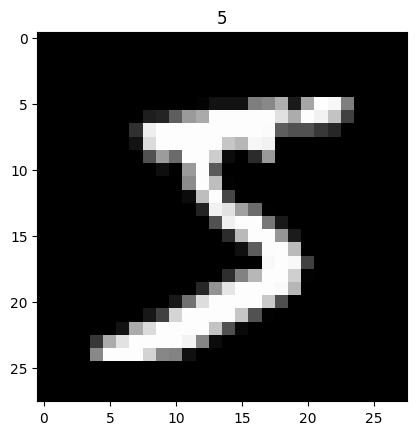

In [2]:
IMAGE_IDX = 0

image = X_train[IMAGE_IDX]
print(image.shape)

plt.imshow(image, cmap='gray')
plt.title(y_train[IMAGE_IDX])
plt.show()

# CNN 레이어에 입력하기 위한 배열 편집
- 반드시 CNN 레이어는  **4차원 배열** 형식을 활용
- (N, H, W, C) 로 변환
- 지금은 H, W만 있음
- 따라서 아래에서 (H,W) -> (N, H, W, C): (배치, 높이, 가로, 채널)

tf.newaxis = 강제로 차원 확장

In [3]:
# (28, 28) -> (1, 28, 28, 1)
image = image[tf.newaxis,..., tf.newaxis]
type(image)

numpy.ndarray

# Conv 레이어 사용
Keras에는 대표적인 두 가지 Conv 레이어가 존재
- Conv2D
  - 필터가 움직이는 방향이 `2방향`(가로, 세로)
  - `이미지 분석`을 위해서 사용하는 일반적인 합성곱 레이어
- Conv1D
  - 필터가 움직이는 방향이 `1방향`
  - `텍스트 분석`을 위해 사용하는 레이어
  - 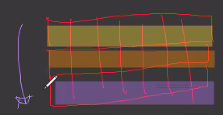


## Conv2D 레이어 매개변수
- `filters` : 필터의 개수 ($C_{out}$)
- `kernel_size` : 커널의 크기($H_k, W_k$)
- `strides` : 몇 개의 픽셀을 스킵하면서 필터가 입력 특성 맵을 훑게 할지 결정
  - stride가 커지면 출력 특징 맵(Output Feature Map)의 크기가 줄어든다.
  - MaxPooling 기법보다 stride 크기를 늘려서 출력 특징 맵의 크기를 줄이는 것이 요즘 추세
- `padding` : 0으로 둘러쌓여진 패딩을 만들 것인지에 대한 설정
  - `VALID` : 패딩을 만들지 않겠다.(기본)
  - `SAME` : Input Feature Map과 Output Feature Map의 크기를 똑같이 만들어주는 패딩을 설정
- `activation` : 활성화 함수를 지정하는 옵션(선택 가능)

In [4]:
from tensorflow.keras.layers import Conv2D

layer = Conv2D(
    filters=5, # C(out)
    kernel_size=(3,3), # H(k), W(k) 커널 정보
    strides=1,
    padding='SAME'
)

layer



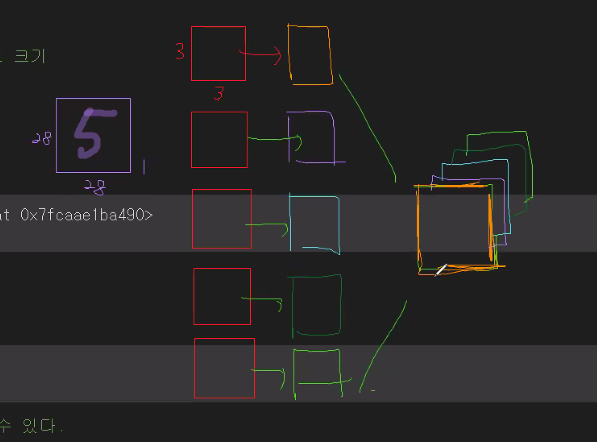



In [5]:
# numpy array를 tensor로 변환
image = tf.cast(image, dtype=tf.float32)
image.shape

TensorShape([1, 28, 28, 1])

In [6]:
# 케라스의 layer 객체는 함수처럼 사용할 수 있다.
conv_output = layer(image)
conv_output.shape

TensorShape([1, 28, 28, 5])

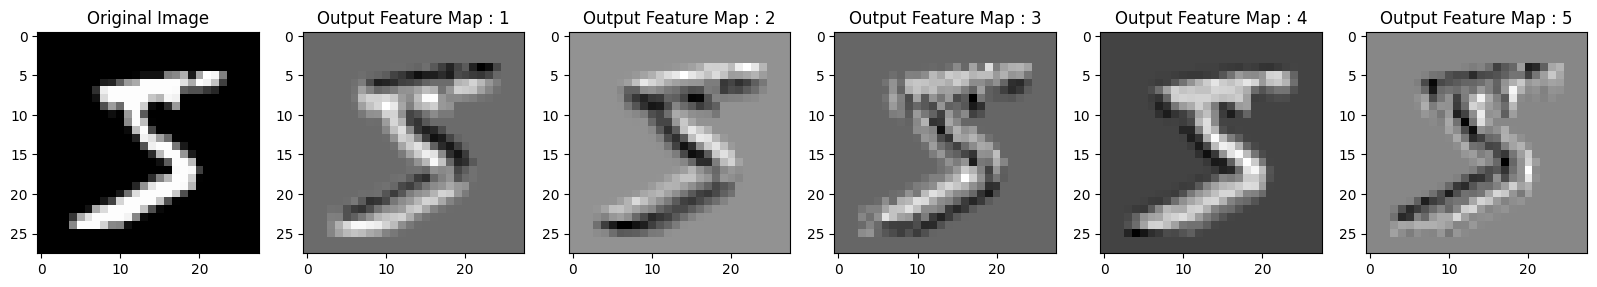

In [7]:
# 시각화화
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

original_image = image[0, ..., 0]
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original Image")

output_features = conv_output[0]

for idx, ax in enumerate(axes[1:]):
  ax.imshow(output_features[..., idx], cmap='gray')
  ax.set_title("Output Feature Map : {}".format(idx + 1))

plt.show()

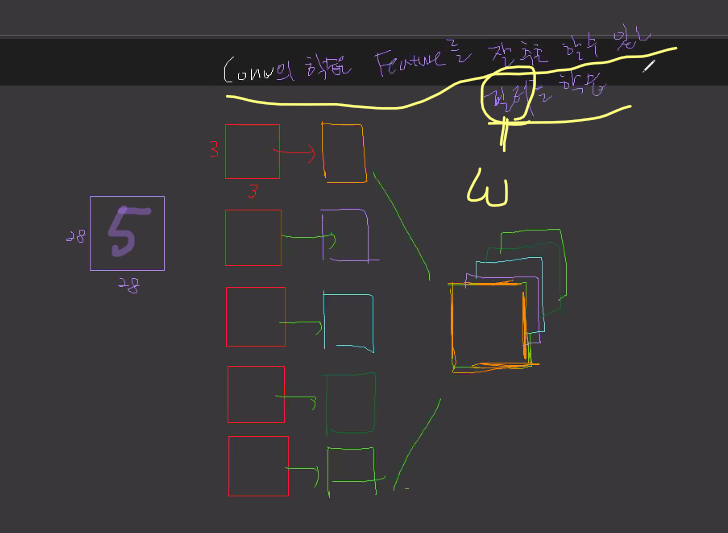

## Filter 시각화
- CNN에서 Filter는 가중치의 역할을 한다.
- 계산 가능한 레이어(학습 대상 레이어. Dense, Conv, LSTM RNN 등등..)에서는 가중치와 편향을 확인할 수 있다.
  - `get_weights()` 함수를 이용해서 가중치와 편향을 확인할 수 있다.

In [8]:
weights = layer.get_weights()
weights

[array([[[[ 0.08712736, -0.16394918, -0.08465204,  0.22431138,
            0.10902405]],
 
         [[ 0.07116485, -0.00686035, -0.11631832, -0.07345447,
           -0.22370283]],
 
         [[ 0.18404809, -0.03802314,  0.16580263, -0.23482108,
            0.1361691 ]]],
 
 
        [[[ 0.1093235 , -0.04958597, -0.0720233 ,  0.26450762,
            0.0505487 ]],
 
         [[ 0.00623742, -0.12109026,  0.0447177 ,  0.256229  ,
            0.03728262]],
 
         [[ 0.12532854, -0.22138786, -0.04435268,  0.20294717,
            0.02343845]]],
 
 
        [[[-0.2729865 ,  0.26940504,  0.28808454,  0.00871062,
            0.2564586 ]],
 
         [[-0.19656412,  0.11294594, -0.19975066, -0.02379546,
           -0.3159024 ]],
 
         [[ 0.09178415,  0.05599728,  0.15484038, -0.04766932,
           -0.12626481]]]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

- `weight[0]`: 필터 내 가중치가 들어있다.
- `weight[1]`: 편향이 들어있다. 


In [9]:
# 필터(가중치)의 shape를 확인.
weights[0].shape

(3, 3, 1, 5)

In [10]:
weights[1].shape

(5,)

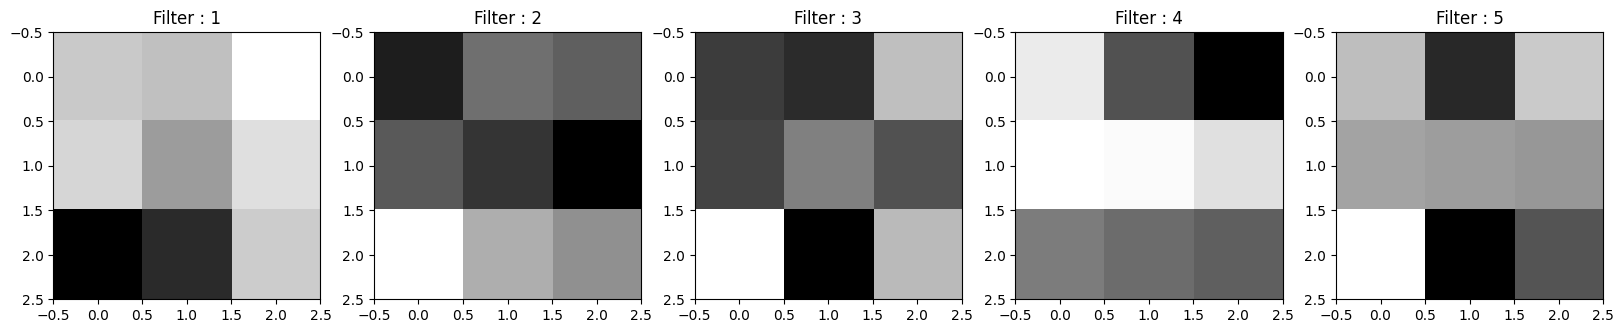

In [11]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter : {}".format(idx + 1))
  ax.imshow(weights[0][..., 0, idx], cmap='gray')

plt.show()

# ReLU 레이어 사용
- 이미지 분석에서 `ReLU`가 자주 사용된다.
- 이미지 데이터에서 음수 데이터는 필요가 없는 데이터
  - 필요 없는 음수 데이터는 제거하고, 이미지 픽셀에서 의미를 가지는 양수 데이터만 강조하기 위해 `ReLU`가 일반적으로 사용된다.
  - 최근에는 `ReLU`와 더불어 `Leakly ReLU`도 같이 사용된다.

In [12]:
import numpy as np

np.min(conv_output), np.max(conv_output)

(-138.56177, 193.10446)

In [13]:
from tensorflow.keras.layers import ReLU

act_layer = ReLU()
act_output = act_layer(conv_output)
act_output.shape

TensorShape([1, 28, 28, 5])

In [14]:
np.min(act_output), np.max(act_output)

(0.0, 193.10446)

## ReLU 시각화

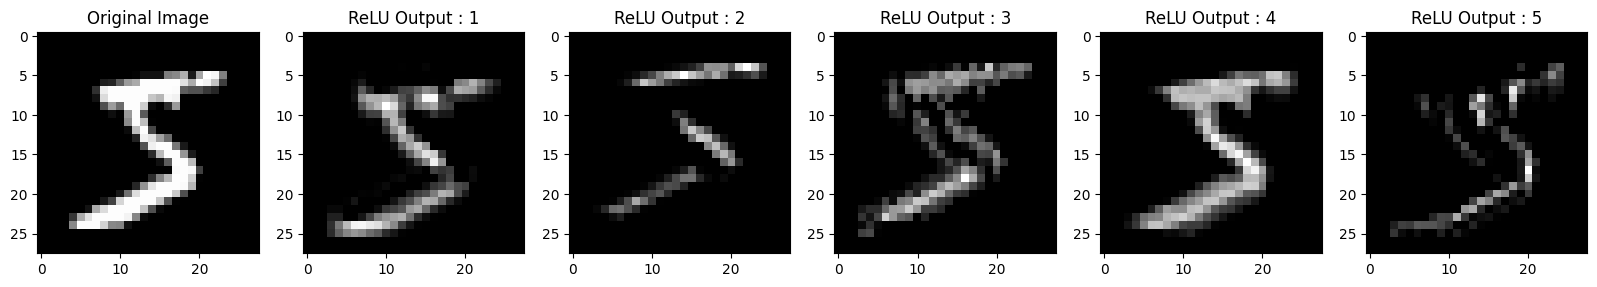

In [15]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("ReLU Output : {}".format(idx + 1))
  ax.imshow(act_output[0, ..., idx], cmap='gray')

plt.show()

# MaxPooling
- 이미지 축소 및 정보의 종합을 구현
- 필요한 정보가 없어질 수도 있기 때문에 최근에는 Conv2D의 stride를 증가시키는 방법으로 이미지 축소를 구현한다.

In [16]:
from tensorflow.keras.layers import MaxPool2D

pool_layer = MaxPool2D(pool_size=2, strides=2) # 겹치지 않게 움직임
pool_output = pool_layer(act_output)
pool_output.shape

TensorShape([1, 14, 14, 5])

## MaxPooling 시각화

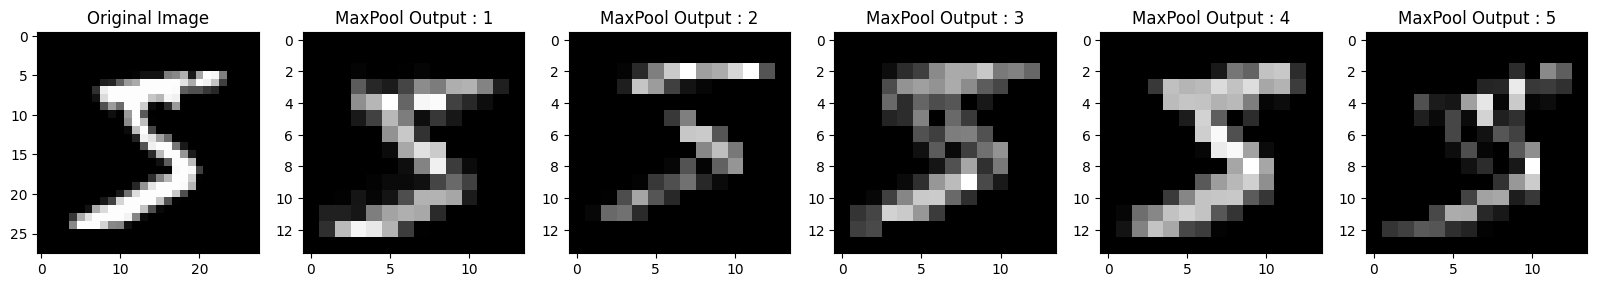

In [17]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("MaxPool Output : {}".format(idx + 1))
  ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()

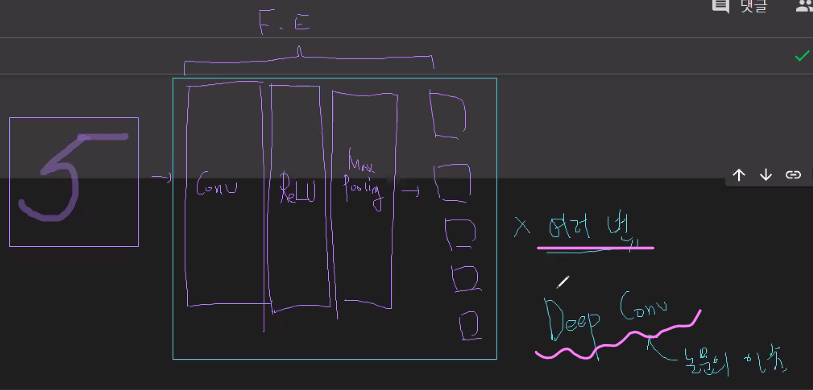

# 이제 FCL 통해 추론!
- Sequential Model로 MNIST 분류기 만들기

In [18]:
from tensorflow.keras.models import Sequential # 모델  위함
from tensorflow.keras.layers import Conv2D, ReLU, MaxPool2D #Feature Extraction 위함
from tensorflow.keras.layers import Flatten, Dense, Input # Fully Connected 위함

model = Sequential([
    Input(shape=(28,28,1)), # 배치 사이즈를 제외한 나머지 값을 넣는다.


    #### Feature Extraction ###
    Conv2D(filters=64, kernel_size=3, padding='SAME',activation='relu'),
    Conv2D(filters=64, kernel_size=3, padding='SAME',activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=32, kernel_size=3, padding='SAME',activation='relu'),
    Conv2D(filters=32, kernel_size=3, padding='SAME',activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    #### Fully Connected ####
    Flatten(), # 채널이 512개 이상인 경우에는 GlobalAveragePooling을 사용 (평탄화 기법 중 하나)
    
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),


    # 출력층
    Dense(10, activation ='softmax')          

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                    

- Feature Extraction의 결과 (flatten필요)
  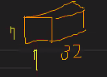

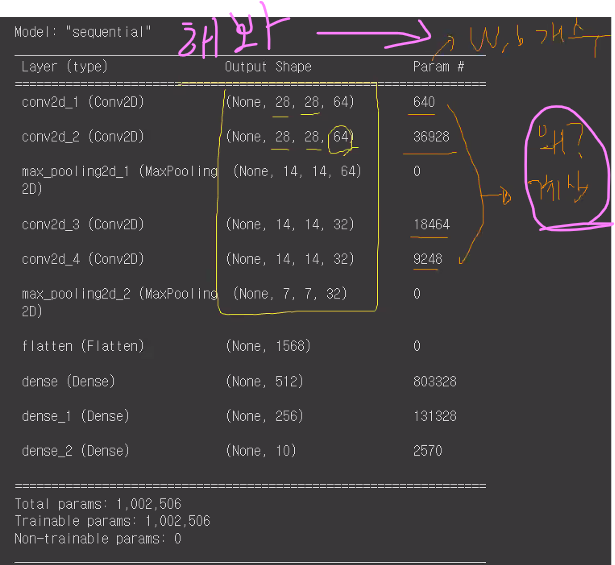

## 이것이 바로 ConvNet!!!!

## 훈련

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

model.compile(
    optimizer=Adam(),
    loss = sparse_categorical_crossentropy,
    metrics=['acc']
)

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.20)

Epoch 1/20
1500/1500 [==============================] - 15s 6ms/step - loss: 0.1813 - acc: 0.9522 - val_loss: 0.0743 - val_acc: 0.9797
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0591 - acc: 0.9818 - val_loss: 0.0562 - val_acc: 0.9826
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0437 - acc: 0.9868 - val_loss: 0.0425 - val_acc: 0.9887
Epoch 4/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0380 - acc: 0.9885 - val_loss: 0.0417 - val_acc: 0.9877
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0349 - acc: 0.9904 - val_loss: 0.0322 - val_acc: 0.9907
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0263 - acc: 0.9921 - val_loss: 0.0354 - val_acc: 0.9907
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0283 - acc: 0.9914 - val_loss: 0.0592 - val_acc: 0.9870
Epoch 8/20
1500/1500 [==============================] - 9s 

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0609 - acc: 0.9899


[0.0609404593706131, 0.9898999929428101]